#WEB SCRAPING & DATA PREPROCESSING(CLEANING)


In [ ]:
import requests  # Import the requests library to send HTTP requests to web pages.[here we will use request to scrape data from projectgutenburg.org]
from bs4 import BeautifulSoup  # Import BeautifulSoup from bs4 for parsing and navigating HTML content.
import re  # Import re for regular expression operations (used for text cleaning).[we have used standard cleaning procedures i.e removal of html tags and unwanted numbers and punctuation]
import os  # Import os to work with the file system (creating directories, saving files).
from google.colab import drive  # Import Google Colab's drive module to interact with Google Drive.

# Mount Google Drive to the Colab environment so files can be accessed and saved.
drive.mount('/content/drive')

# Define the base directory path in Google Drive to store the fine-tuning dataset files.
base_folder_path = '/content/drive/My Drive/finetuning_datasets'
# Create the directory if it does not already exist.
os.makedirs(base_folder_path, exist_ok=True)

# Define a function to clean text by removing unwanted elements like HTML tags, numbers, and punctuation.
def clean_text(text):
    cleaned_text = text.lower()  # Convert text to lowercase for consistency.
    cleaned_text = re.sub(r'<.*?>', '', cleaned_text)  # Remove any HTML tags. [re.sub(pattern, replacement, string): here we replace the given regex to blank]
    cleaned_text = re.sub(r'[^a-z0-9.,;:?!\'"() ]+', ' ', cleaned_text)  # Keep specific punctuation, removing other symbols.
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()  # Replace multiple spaces with a single space and trim.
    return cleaned_text  # Return the cleaned text.

# Define a function to scrape content from a URL and clean it.
def scrape_book_content(url, word_limit):
    response = requests.get(url)  # Send an HTTP GET request to the provided URL.
    if response.status_code != 200:  # Check if the response status is not 200 (meaning the request failed).
        print("Failed to retrieve the page.")  # Print an error message.
        return ""  # Return an empty string if the request failed.
    soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content of the page with BeautifulSoup.
    book_content = soup.find_all('p')  # Extract all paragraph ('<p>') elements, as they contain text content.here book_content is a list storing the paragraphs
    text = ' '.join([para.get_text() for para in book_content])  # uisng list comprehension Concatenate the text from each paragraph.Iterate over each element in the list, extract text using get_text and the join each element with a space.

    # Check if the text exceeds the word limit.
    if len(text.split()) > word_limit:  # Split text into words and check the word count.
        text = ' '.join(text.split()[:word_limit])  # Limit the text to the specified word count via slicing list.

    return clean_text(text)  # Clean and return the extracted text.

# Define a function to save cleaned text data to a file in the fine-tuning datasets folder.
def save_text_to_file(text, filename):
    file_path = os.path.join(base_folder_path, filename)  # Generate the full path for the file.
    with open(file_path, 'w') as f:  # Open the file in write mode.
        f.write(text)  # Write the text to the file.
    print(f"Saved cleaned text to {file_path}")  # Print a message confirming where the file was saved.

# Dictionary of URLs for genre-specific books. Each key represents a genre, and each value is a URL to a book in that genre.
genre_urls = {
    "fantasy": "https://www.gutenberg.org/cache/epub/1251/pg1251-images.html",  # Fantasy book (Le Morte d'Arthur).
    "science_fiction": "https://www.gutenberg.org/cache/epub/84/pg84-images.html",  # Sci-fi book (Frankenstein).
    "mystery": "https://www.gutenberg.org/cache/epub/2554/pg2554-images.html",  # Mystery book (Crime and Punishment).
    "romance": "https://www.gutenberg.org/cache/epub/67979/pg67979-images.html",  # Romance book (The Blue Castle).
    "horror": "https://www.gutenberg.org/cache/epub/345/pg345-images.html"  # Horror book (Dracula).
}

# Set a word limit for the amount of text to extract and clean per book.
word_limit = 50000
# Loop through each genre and URL in genre_urls to scrape, clean, and save data.
for genre, url in genre_urls.items():
    book_text = scrape_book_content(url, word_limit)  # Scrape and clean the book content.
    save_text_to_file(book_text, f'cleaned_{genre}.txt')  # Save the cleaned text with a genre-specific filename.


Mounted at /content/drive
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_fantasy.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_science_fiction.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_mystery.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_romance.txt
Saved cleaned text to /content/drive/My Drive/finetuning_datasets/cleaned_horror.txt


#EDA OF THE CLEANED DATASETS

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Analysis for cleaned_fantasy.txt ===
Total Words: 50290
Unique Words: 4890
Total Sentences: 1841
Average Words per Sentence: 27.32
Total Characters: 258163
Total Paragraphs: 1


<ipython-input-8-de5f58621072>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.


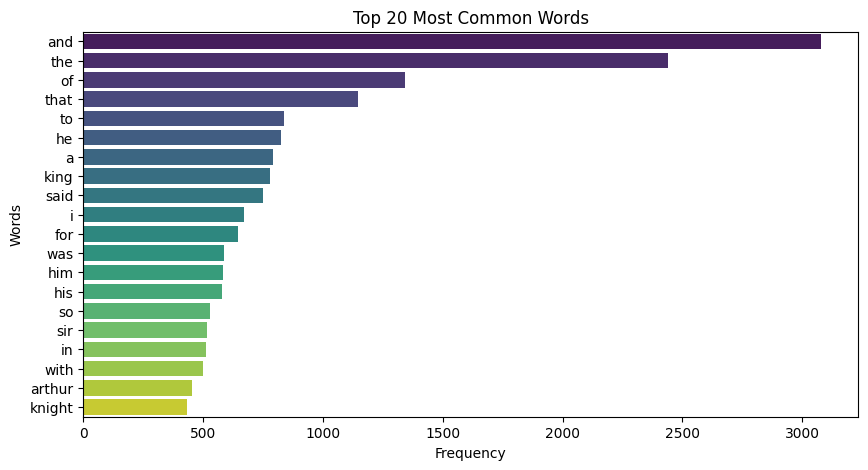

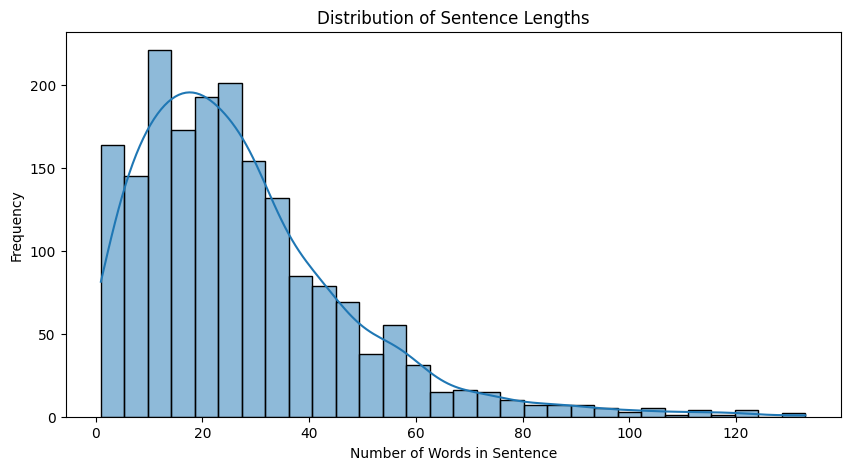

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


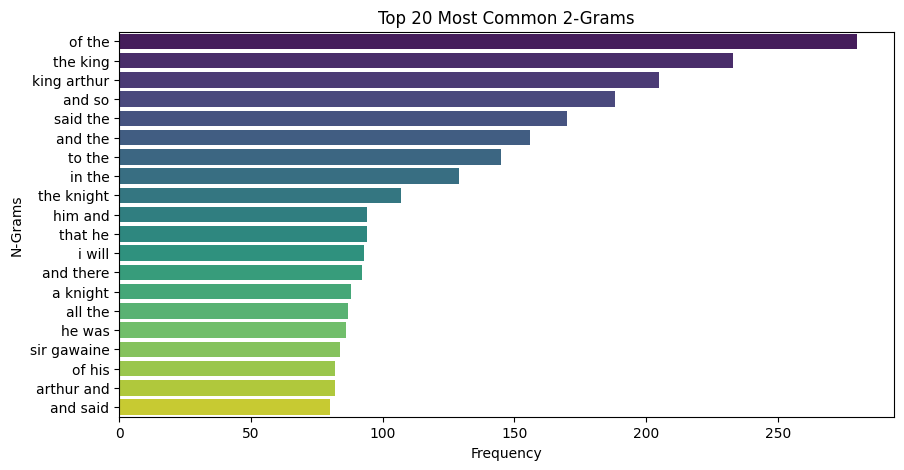

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


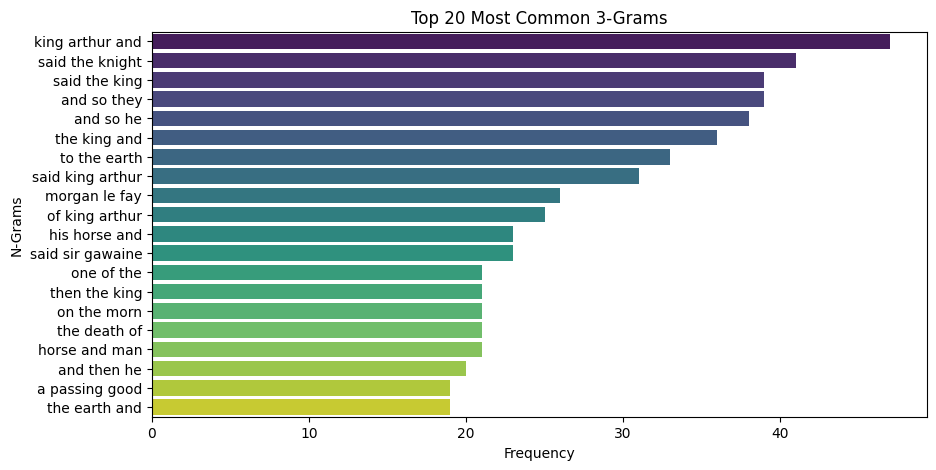

<ipython-input-8-de5f58621072>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.


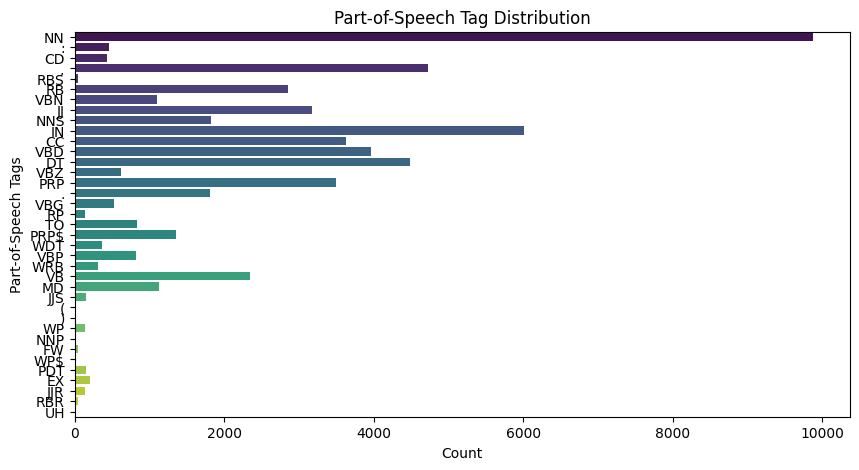

Flesch Reading Ease Score: 76.59
Flesch-Kincaid Grade Level: 9.60

=== Analysis for cleaned_science_fiction.txt ===
Total Words: 50251
Unique Words: 8590
Total Sentences: 2270
Average Words per Sentence: 22.14
Total Characters: 279671
Total Paragraphs: 1


<ipython-input-8-de5f58621072>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.


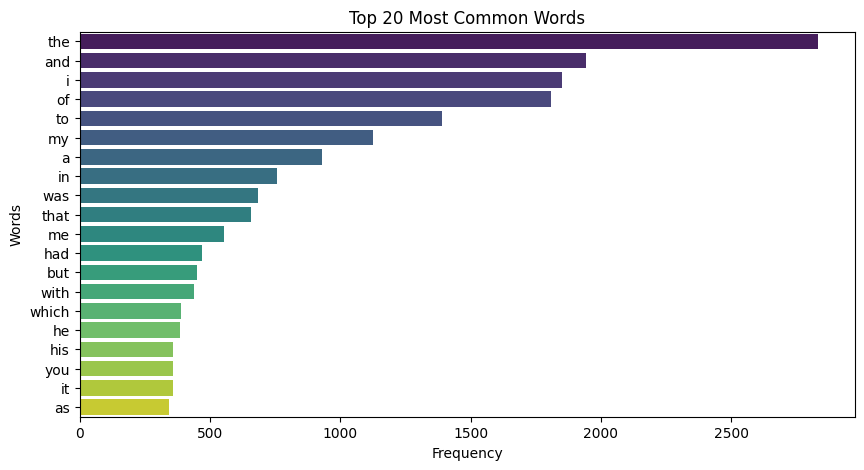

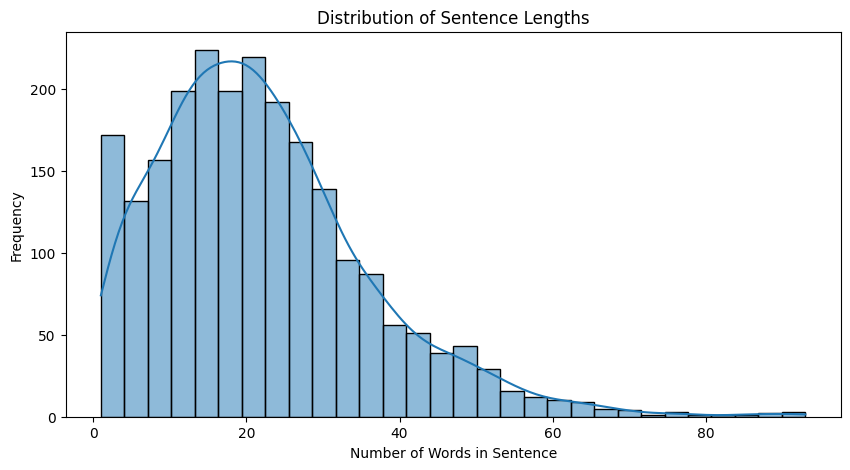

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


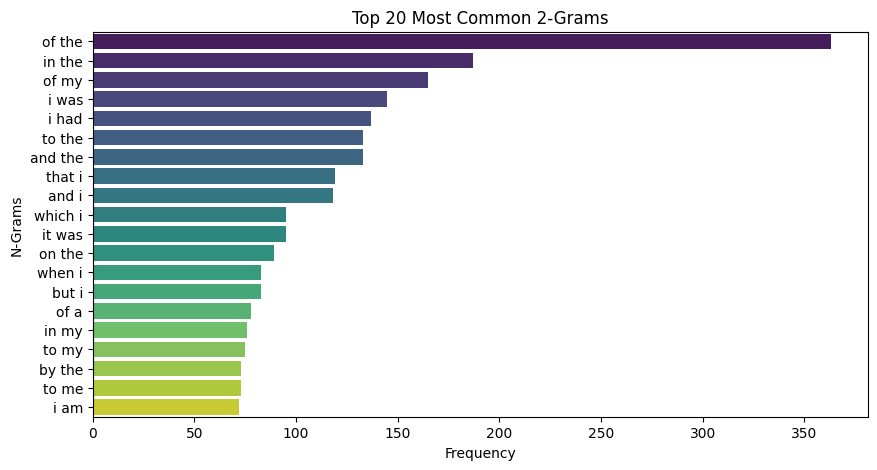

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


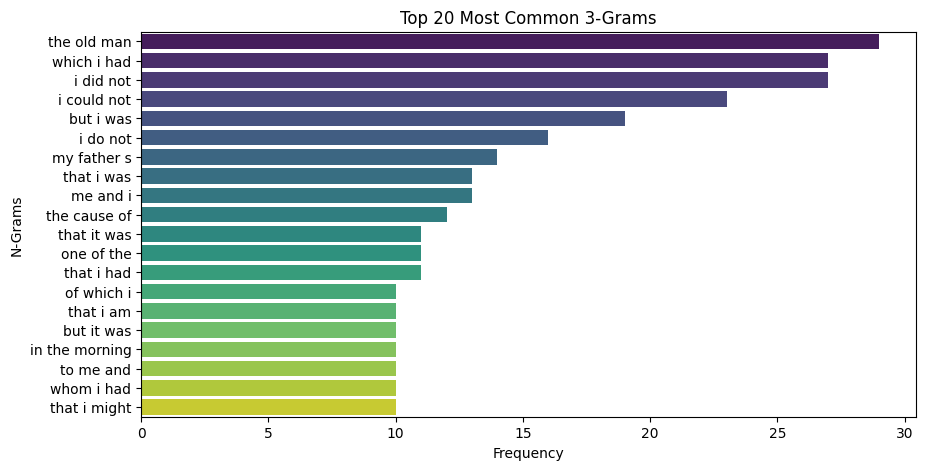

<ipython-input-8-de5f58621072>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.


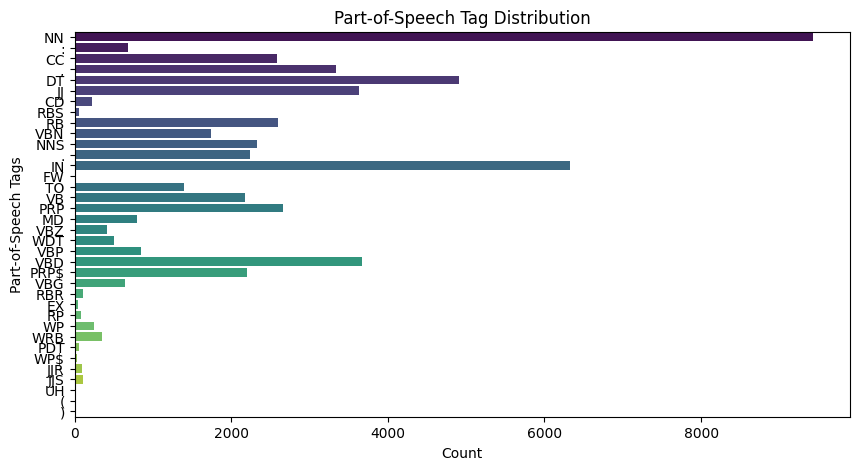

Flesch Reading Ease Score: 65.15
Flesch-Kincaid Grade Level: 9.90

=== Analysis for cleaned_mystery.txt ===
Total Words: 50937
Unique Words: 7903
Total Sentences: 3345
Average Words per Sentence: 15.23
Total Characters: 271025
Total Paragraphs: 1


<ipython-input-8-de5f58621072>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.


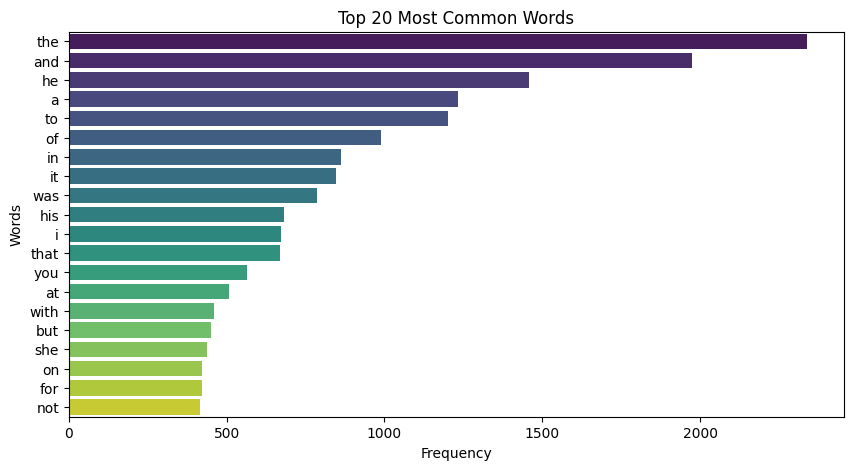

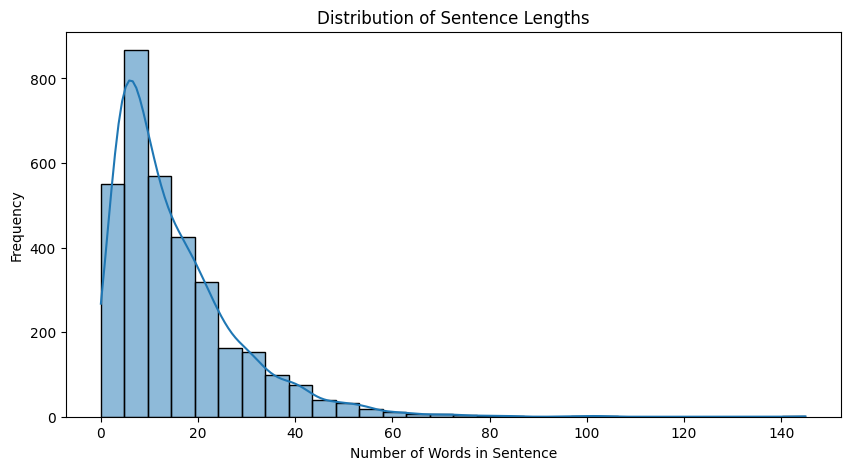

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


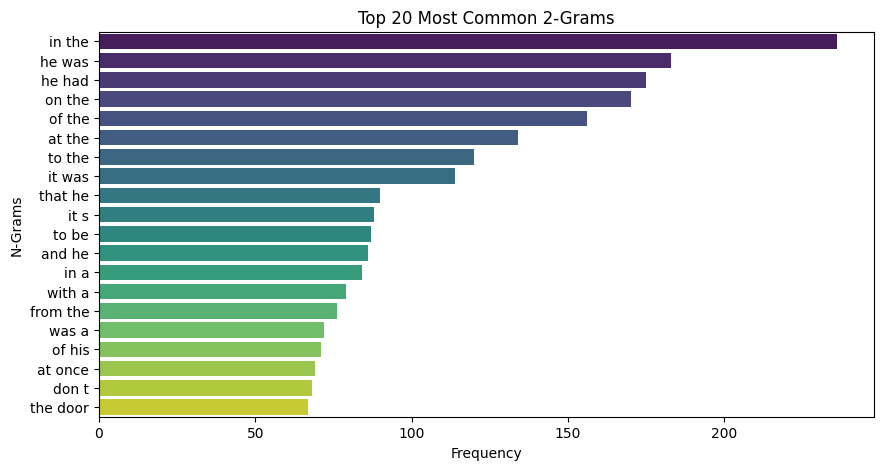

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


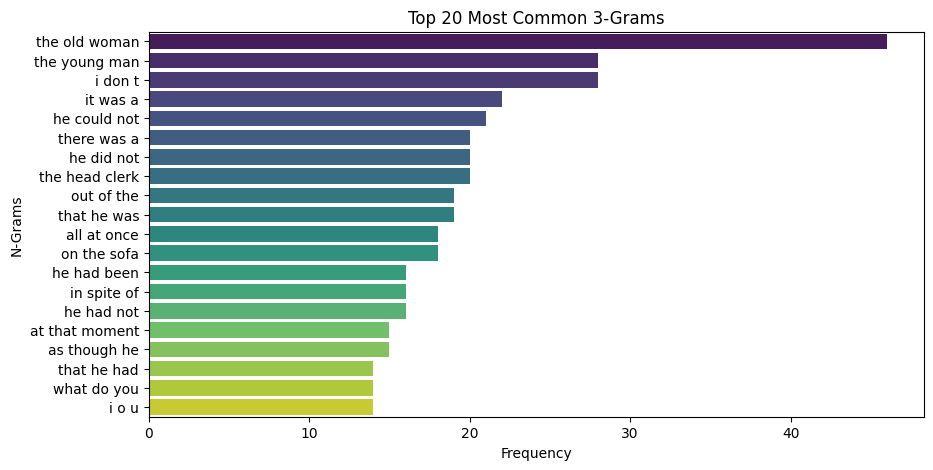

<ipython-input-8-de5f58621072>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.


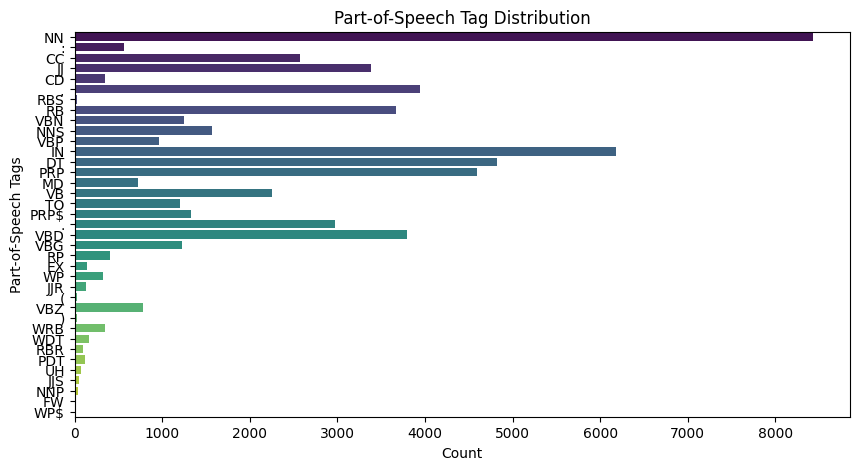

Flesch Reading Ease Score: 80.41
Flesch-Kincaid Grade Level: 6.10

=== Analysis for cleaned_romance.txt ===
Total Words: 52293
Unique Words: 8075
Total Sentences: 4442
Average Words per Sentence: 11.77
Total Characters: 281864
Total Paragraphs: 1


<ipython-input-8-de5f58621072>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.


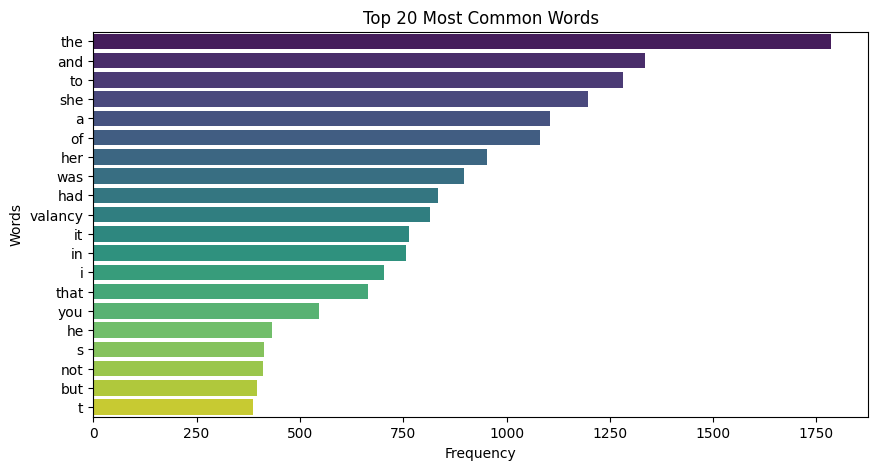

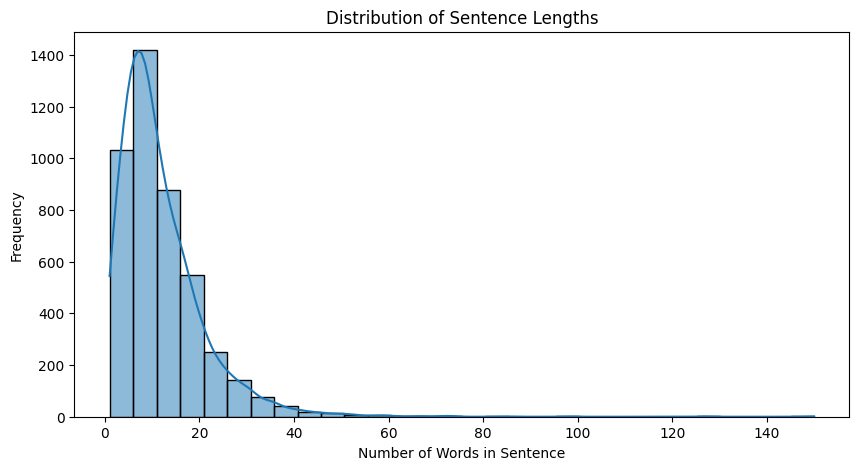

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


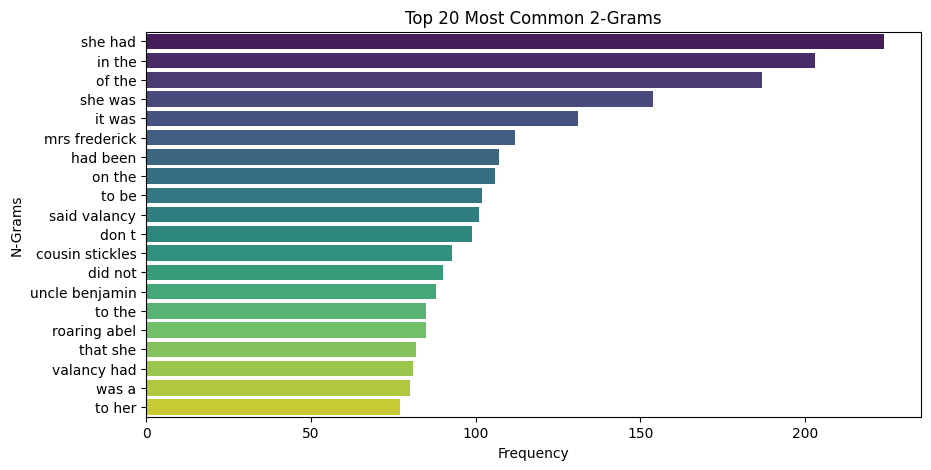

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


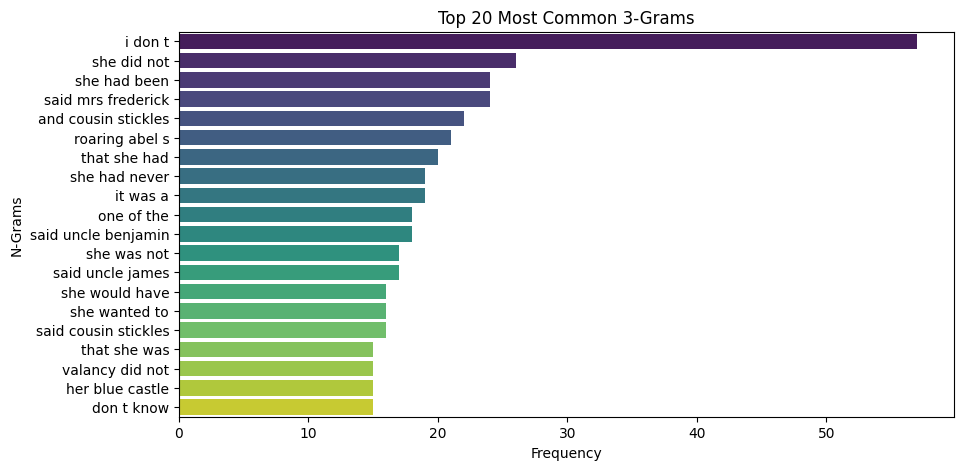

<ipython-input-8-de5f58621072>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.


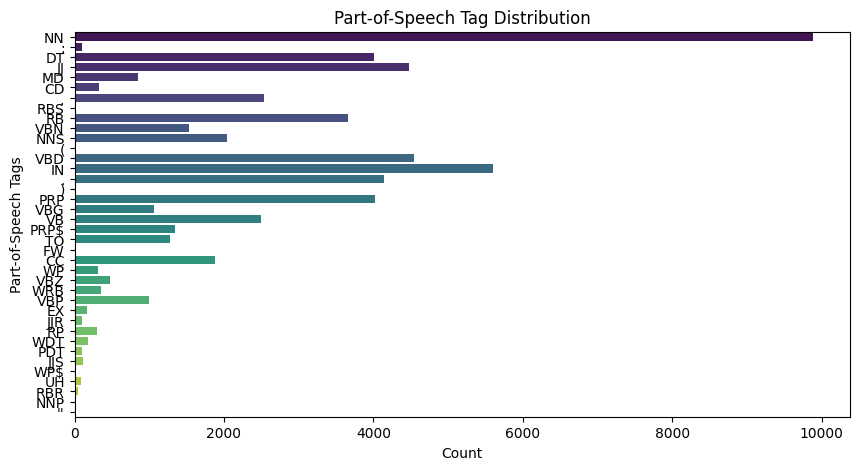

Flesch Reading Ease Score: 83.96
Flesch-Kincaid Grade Level: 4.70

=== Analysis for cleaned_horror.txt ===
Total Words: 50896
Unique Words: 7924
Total Sentences: 2723
Average Words per Sentence: 18.69
Total Characters: 259682
Total Paragraphs: 1


<ipython-input-8-de5f58621072>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.


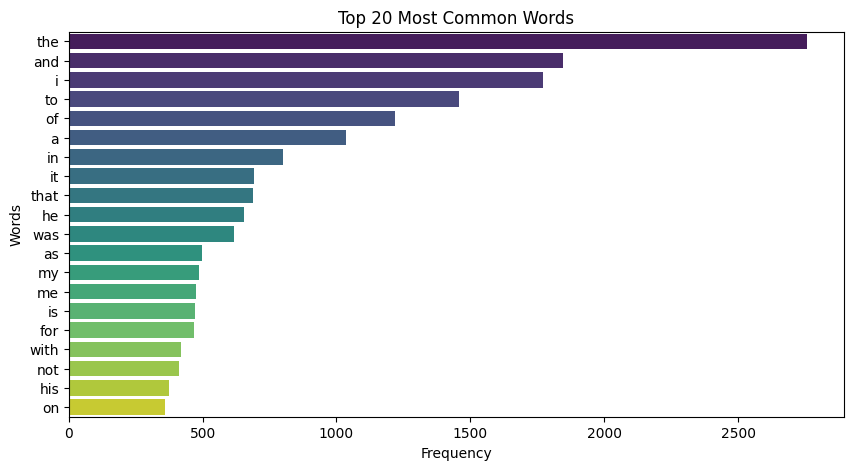

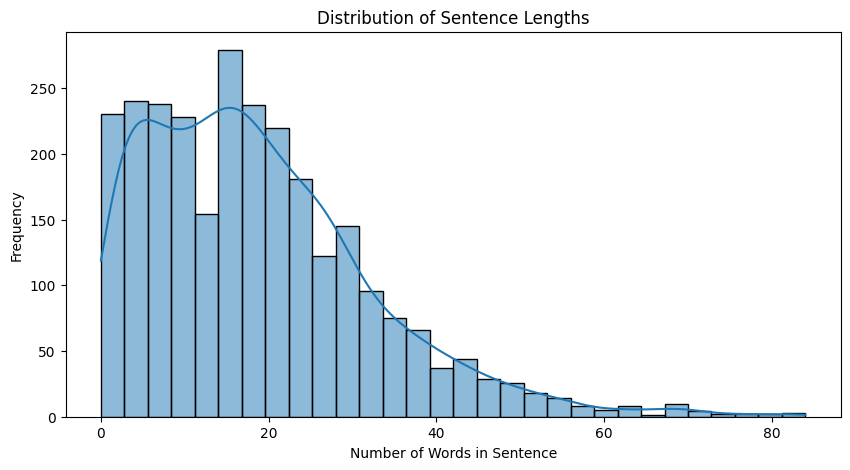

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


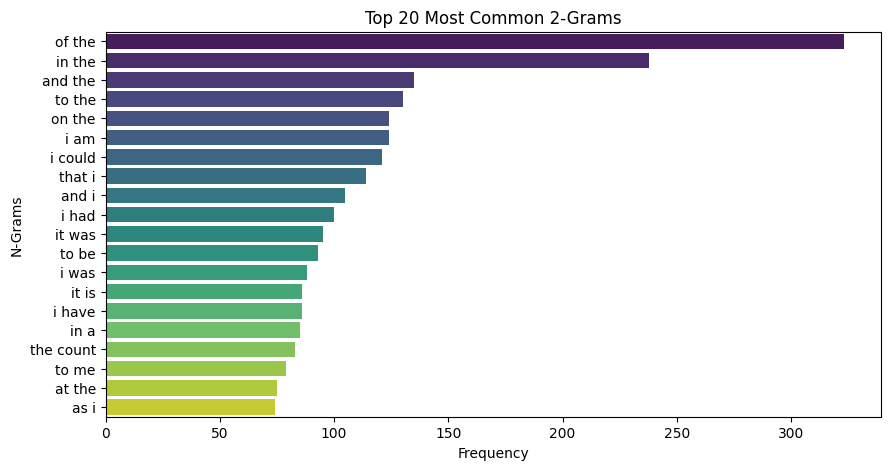

<ipython-input-8-de5f58621072>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.


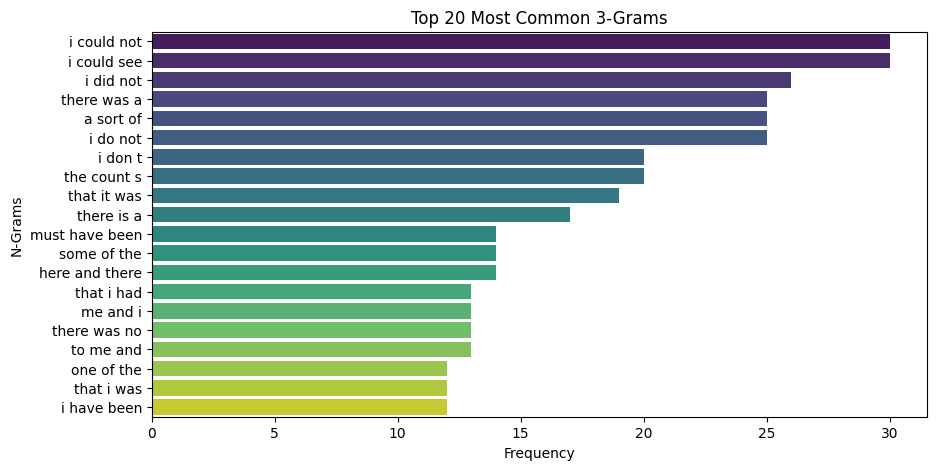

<ipython-input-8-de5f58621072>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.


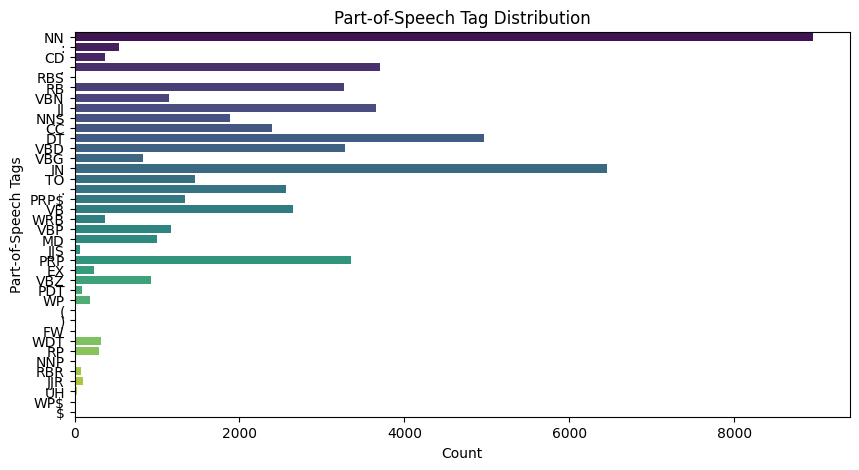

Flesch Reading Ease Score: 84.61
Flesch-Kincaid Grade Level: 6.50


In [ ]:

import re  # Regular expressions for text pattern matching and manipulation.
import os  # Operating system functions to work with files and directories.
import pandas as pd  # Library for data manipulation and analysis, especially for tabular data.
import matplotlib.pyplot as plt  # Matplotlib's plotting library for visualizing data.
import seaborn as sns  # Seaborn library to enhance matplotlib visualizations.
from collections import Counter  # Counter to count occurrences of elements in collections.
from nltk import ngrams, pos_tag  # NLTK tools for generating n-grams and part-of-speech tagging.
from nltk.tokenize import word_tokenize  # NLTK's word tokenizer for breaking text into words.
from textstat import flesch_reading_ease, flesch_kincaid_grade  # Readability metrics for text complexity.[how easy is it for readers to read the text]
import nltk  # Natural Language Toolkit (NLTK) for text processing functions.

# Download NLTK's 'punkt' tokenizer and 'averaged_perceptron_tagger' for tokenization and POS tagging.
nltk.download('punkt') #its a tokenizer from nltk which helps in tokenizing the words
nltk.download('averaged_perceptron_tagger') # It assigns tags like NN (noun), VB (verb), JJ (adjective), etc.
"""The purpose of POS tagging is for a future scope to enable analysis such as sentiment analysis, tone detection, authors writing style,named entity recognition,etc """
# Mount Google Drive to save and load files in Google Colab.
from google.colab import drive
drive.mount('/content/drive')

# Define a folder path in Google Drive to save dataset files for fine-tuning.
base_folder_path = '/content/drive/My Drive/finetuning_datasets'
os.makedirs(base_folder_path, exist_ok=True)  # Create the directory if it doesn’t exist.

# Function to load cleaned text from a file.
def load_text(file_path):
    with open(file_path, 'r') as file:  # Open file in read mode.
        return file.read()  # Return the file’s text content.

# Function to calculate basic text metrics like word and sentence counts.
def text_metrics(text):
    words = text.split()  # Split text into a list of words.
    total_words = len(words)  # Count the total words.
    unique_words = len(set(words))  # Count unique words by converting to a set.
    sentences = re.split(r'[.!?]+', text)  # Split text into sentences based on punctuation.
    total_sentences = len(sentences) - 1  # Subtract 1 to remove an extra empty split.
    avg_words_per_sentence = total_words / total_sentences if total_sentences > 0 else 0  # Calculate average words per sentence.
    return total_words, unique_words, total_sentences, avg_words_per_sentence

# Function to compute advanced text metrics such as character and paragraph counts.
def advanced_text_metrics(text):
    total_chars = len(text)  # Count the number of characters.
    total_paragraphs = text.count('\n\n') + 1  # Count paragraphs based on double newlines.
    return total_chars, total_paragraphs

# Function to print calculated basic and advanced metrics for given text.
def print_text_metrics(text):
    total_words, unique_words, total_sentences, avg_words_per_sentence = text_metrics(text)  # Get basic metrics by calling the text metrics function
    print(f"Total Words: {total_words}")  # Print the metrics using fstrings.
    print(f"Unique Words: {unique_words}")
    print(f"Total Sentences: {total_sentences}")
    print(f"Average Words per Sentence: {avg_words_per_sentence:.2f}") #Round off to two decimals

    total_chars, total_paragraphs = advanced_text_metrics(text)  # Get advanced metrics by calling the advanced metrics function
    print(f"Total Characters: {total_chars}")
    print(f"Total Paragraphs: {total_paragraphs}")

# Function to plot the frequency of the most common words.
def plot_word_frequency(text, num_words=20):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and lowercase words in text.
    """The regex works like this the \b specifies the start boundary of the words, \w+ checks for permissible character[a-z,A-Z,numbers,_]
    and the last \b ends the boundary i.e last letter of word"""
    word_counts = Counter(words)  # Count each word's frequency using the counter library.
    most_common_words = word_counts.most_common(num_words)  # Get the top 'num_words' most common words.[This method belongs to the counter library]
    df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])  # Create a DataFrame from word frequencies.
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')  # Plot a bar chart of word frequencies.
    plt.title(f'Top {num_words} Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()  # Display the plot.

# Function to plot the distribution of sentence lengths in the text.
def plot_sentence_length_distribution(text):
    sentences = re.split(r'[.!?]+', text)  # Split text into sentences.
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]  # Use List Comprehention to calculate sentence length if there is a sentence in the sentenceslist.
    plt.figure(figsize=(10, 5))
    sns.histplot(sentence_lengths, bins=30, kde=True)  # Plot a histogram of sentence lengths with a KDE(Kernel Density Estimate) overlay(The line connecting the midpoits of each bar in the graph).
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Number of Words in Sentence')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot the most common n-grams (bigrams and trigrams).
def plot_ngrams(text, n=2, num_ngrams=20):
    tokens = re.findall(r'\b\w+\b', text.lower())  # Tokenize and lowercase words in text.
    n_grams = ngrams(tokens, n)  # Generate n-grams using nltk lib.
    ngram_counts = Counter(n_grams)  # Count each n-gram's frequency using counter class from collections lib.
    most_common_ngrams = ngram_counts.most_common(num_ngrams)  # Get the top 'num_ngrams' most common n-grams using counter class of collection lib.
    df = pd.DataFrame(most_common_ngrams, columns=['N-Gram', 'Frequency'])  # Create a DataFrame for n-grams.
    df['N-Gram'] = df['N-Gram'].apply(lambda x: ' '.join(x))  #Since the ngrams retrieved in the form of tuples convert tuples to strings for display using anonynuomous func.
    """#before converting:('hello', 'world') after converting to string:hello world
    def join_ngram(ngram):
      return ' '.join(ngram)
    df['N-Gram'] = df['N-Gram'].apply(join_ngram)"""
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='N-Gram', data=df, palette='viridis')  # Plot n-gram frequencies.
    plt.title(f'Top {num_ngrams} Most Common {n}-Grams')
    plt.xlabel('Frequency')
    plt.ylabel('N-Grams')
    plt.show()

# Function to analyze the distribution of part-of-speech (POS) tags in text.
def pos_tagging_analysis(text):
    tokens = word_tokenize(text)  # Tokenize text into words using nltk(punkt).
    pos_tags = pos_tag(tokens)  # Get part-of-speech tags for each token using nltks averaged_perceptron_tagger class' func.
    pos_count = Counter(tag for word, tag in pos_tags)  # Using Listt comp we count occurrences of each POS tag.
    """Iterate over the pos_tags list which stores the POS tags for each token  and return tag iterable's count using Counter function of collections"""
    pos_df = pd.DataFrame(pos_count.items(), columns=['POS', 'Count'])  # Create DataFrame for POS tags.
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Count', y='POS', data=pos_df, palette='viridis')  # Plot POS tag distribution.
    plt.title('Part-of-Speech Tag Distribution')
    plt.xlabel('Count')
    plt.ylabel('Part-of-Speech Tags')
    plt.show()

# Function to calculate and print readability scores(using textstat lib).
def readability_analysis(text):
    flesch_score = flesch_reading_ease(text)  # Calculate Flesch Reading Ease score.
    kincaid_grade = flesch_kincaid_grade(text)  # Calculate Flesch-Kincaid Grade Level.
    print(f"Flesch Reading Ease Score: {flesch_score:.2f}") #round them of to 2 decs
    print(f"Flesch-Kincaid Grade Level: {kincaid_grade:.2f}")

# List of files for each genre of text data.
genre_files = ["cleaned_fantasy.txt", "cleaned_science_fiction.txt", "cleaned_mystery.txt", "cleaned_romance.txt", "cleaned_horror.txt"]

# Perform Exploratory Data Analysis (EDA) for each genre's dataset by iteracting over each file in the list.
for genre_file in genre_files:
    print(f"\n=== Analysis for {genre_file} ===")  # Print header for each file.
    file_path = os.path.join(base_folder_path, genre_file)  # Build path to each genre file.eg: /drive/mydrive.finetuned_Dataset/ + .join + genrefilename.txt
    text_data = load_text(file_path)  # Load text data from file.

#callnig the below functions to display EDA results
    # Print text metrics.
    print_text_metrics(text_data)

    # Plot word frequency and sentence length distribution.
    plot_word_frequency(text_data, num_words=20)
    plot_sentence_length_distribution(text_data)

    # Plot bigrams and trigrams.
    plot_ngrams(text_data, n=2, num_ngrams=20)  # Bigrams
    plot_ngrams(text_data, n=3, num_ngrams=20)  # Trigrams

    # Part-of-speech tagging analysis.
    pos_tagging_analysis(text_data)

    # Readability analysis.
    readability_analysis(text_data)


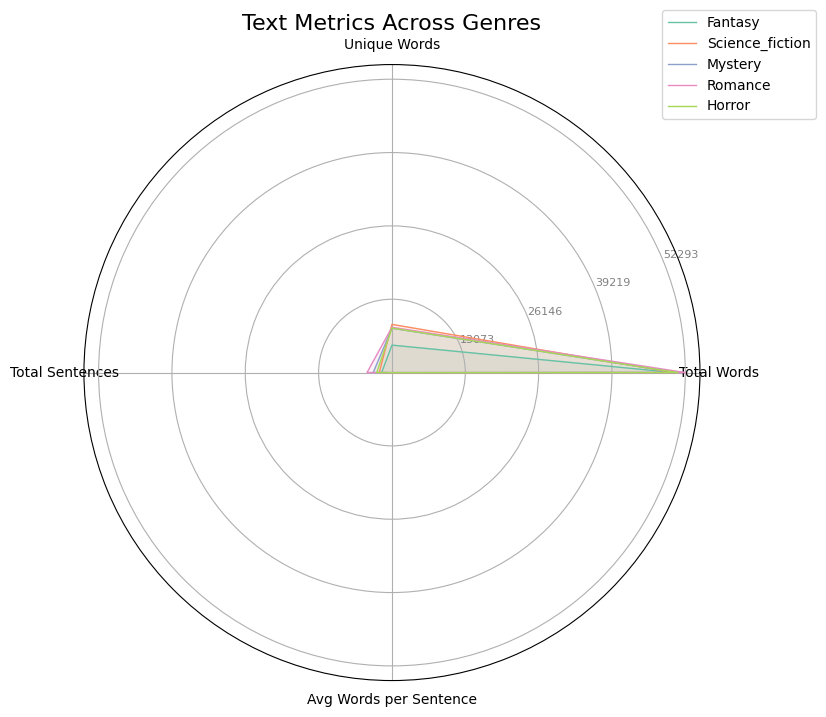

In [ ]:
# Radar chart function for text metrics
def plot_radar_chart(metrics_data, genres):
    metrics = ['Total Words', 'Unique Words', 'Total Sentences', 'Avg Words per Sentence']
    num_vars = len(metrics)

    # Compute angle for each axis in the radar chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the plot

    # Colors for each genre
    colors = sns.color_palette("Set2", len(genres))

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for idx, (data, genre) in enumerate(zip(metrics_data, genres)):
        values = data + data[:1]  # Close the plot
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=genre, color=colors[idx])
        ax.fill(angles, values, color=colors[idx], alpha=0.1)

    # Set the category labels and legend for metrics
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, size=10)
    ax.set_title('Text Metrics Across Genres', size=16)

    # Adding ticks for values on the radar chart
    max_value = max(max(sublist) for sublist in metrics_data)
    tick_values = [max_value * 0.25, max_value * 0.5, max_value * 0.75, max_value]  # Example tick values based on max
    ax.set_yticks(tick_values)
    ax.set_yticklabels([f"{int(val)}" for val in tick_values], color="grey", size=8)  # Convert values to string for labels

    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()

# List of genre files
genre_files = ["cleaned_fantasy.txt", "cleaned_science_fiction.txt", "cleaned_mystery.txt", "cleaned_romance.txt", "cleaned_horror.txt"]

# Variables to store metrics for radar chart
genres = []
metrics_data = []

for genre_file in genre_files:
    file_path = os.path.join(base_folder_path, genre_file)
    text_data = load_text(file_path)

    # Calculate and store metrics for radar plot
    total_words, unique_words, total_sentences, avg_words_per_sentence = text_metrics(text_data)
    metrics_data.append([total_words, unique_words, total_sentences, avg_words_per_sentence])
    genres.append(genre_file.replace("cleaned_", "").replace(".txt", "").capitalize())

# Plot Radar Chart for Text Metrics
plot_radar_chart(metrics_data, genres)



=== Analysis for Fantasy ===


<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




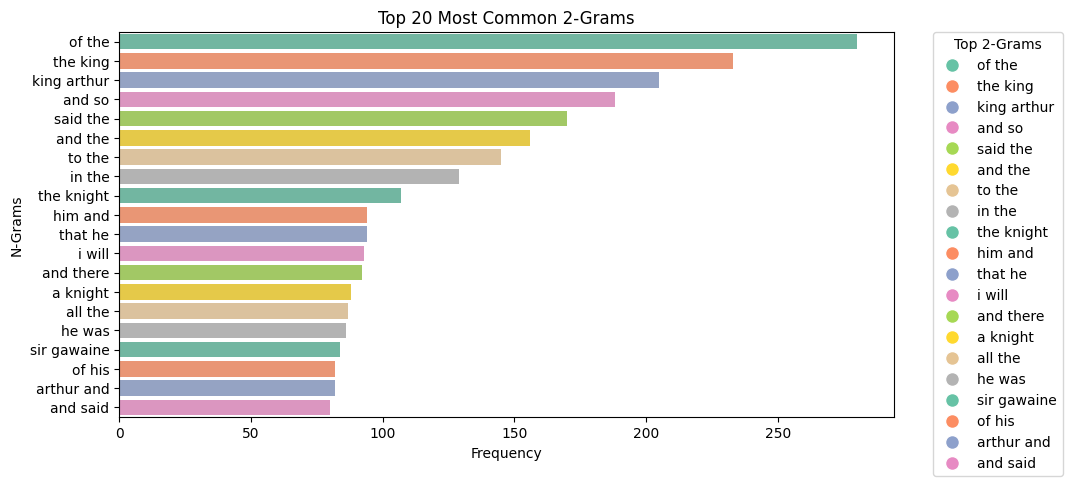

<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




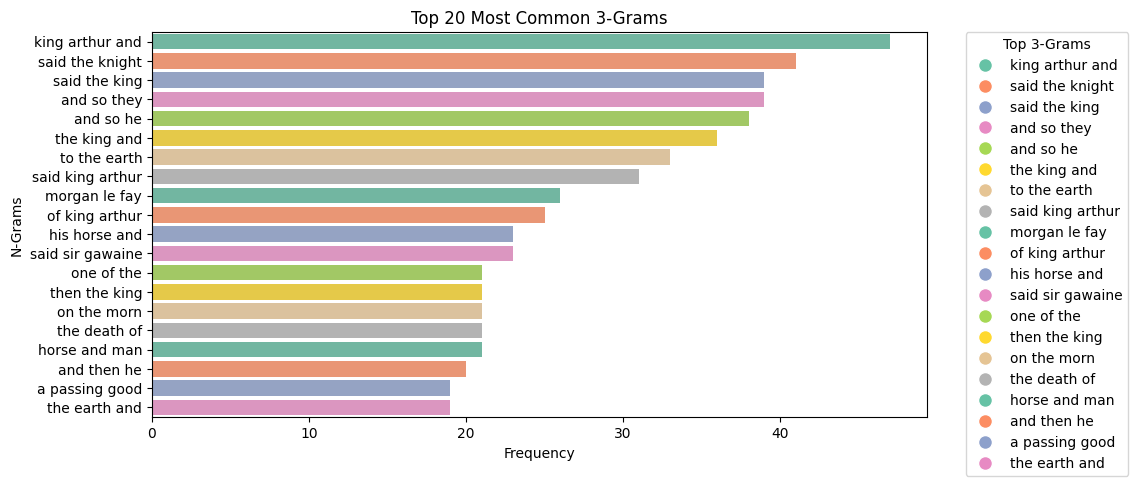


=== Analysis for Science ===


<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




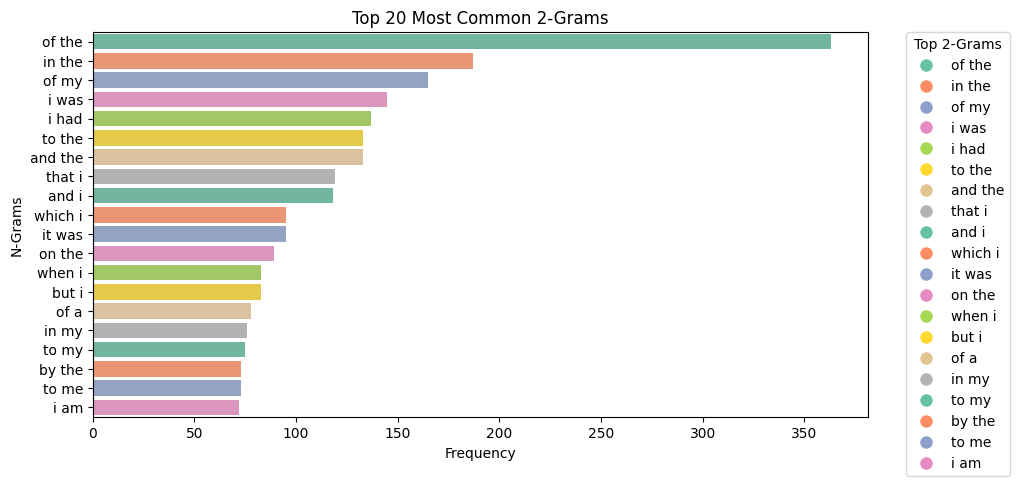

<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




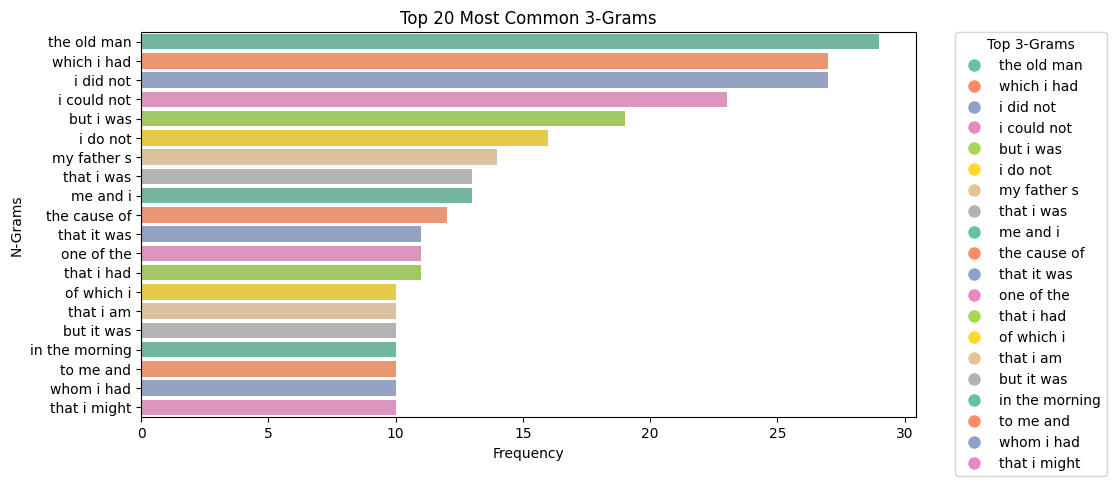


=== Analysis for Mystery ===


<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




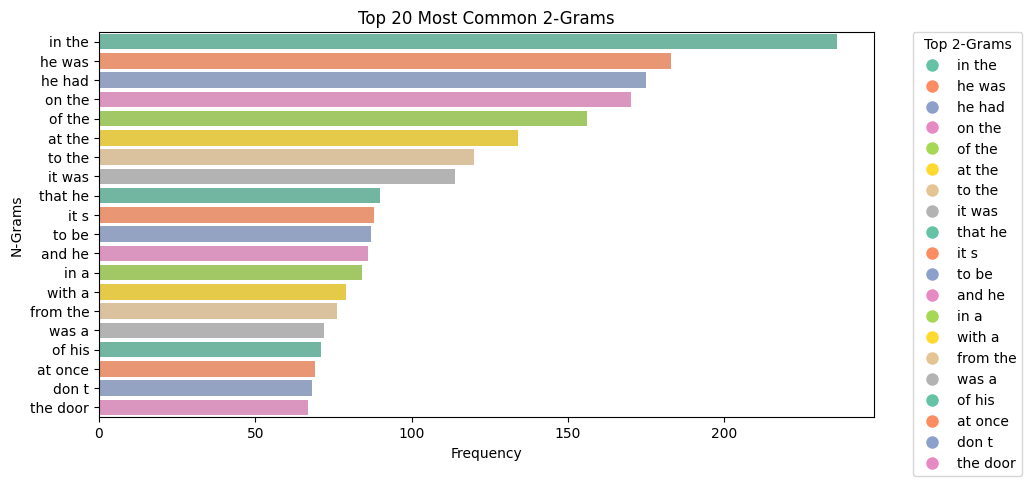

<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




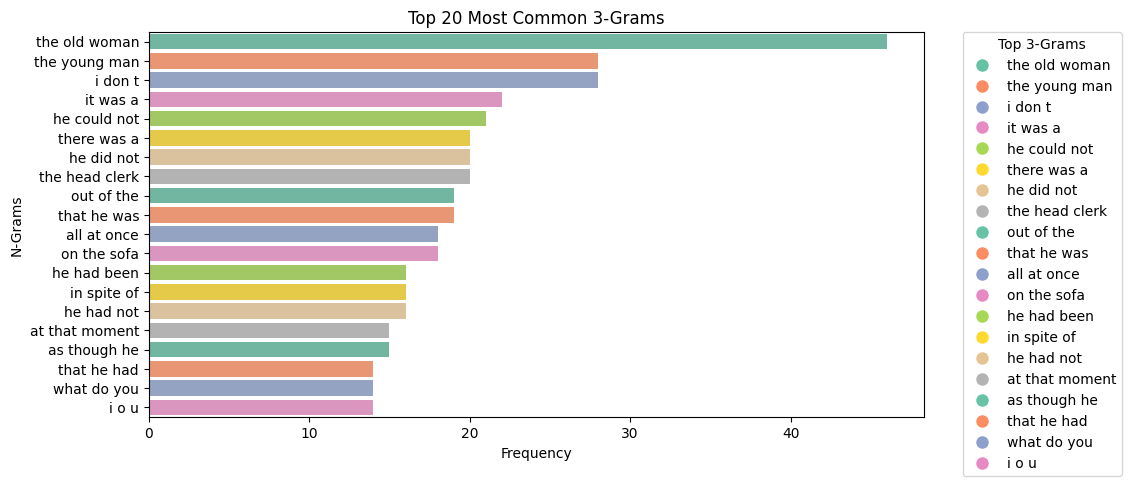


=== Analysis for Romance ===


<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




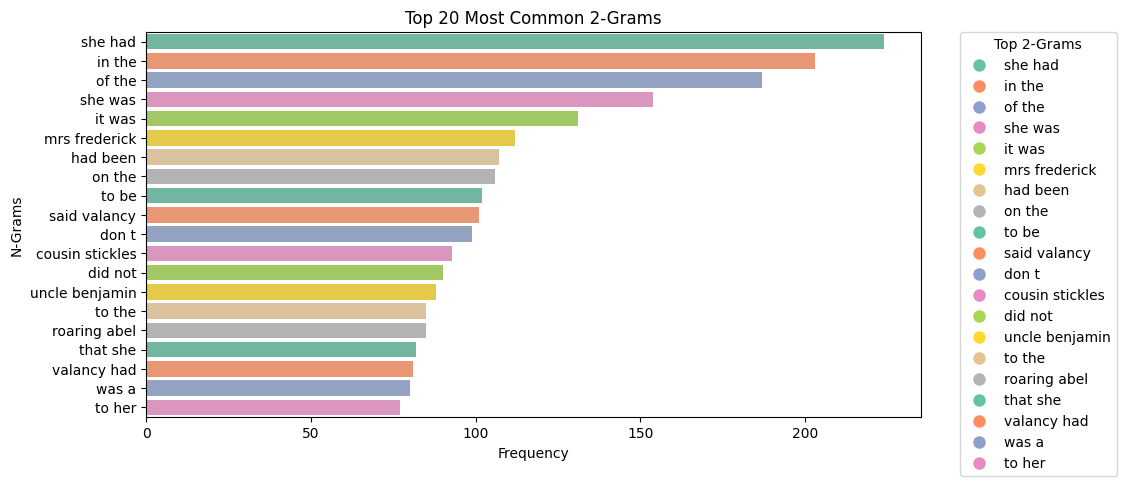

<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




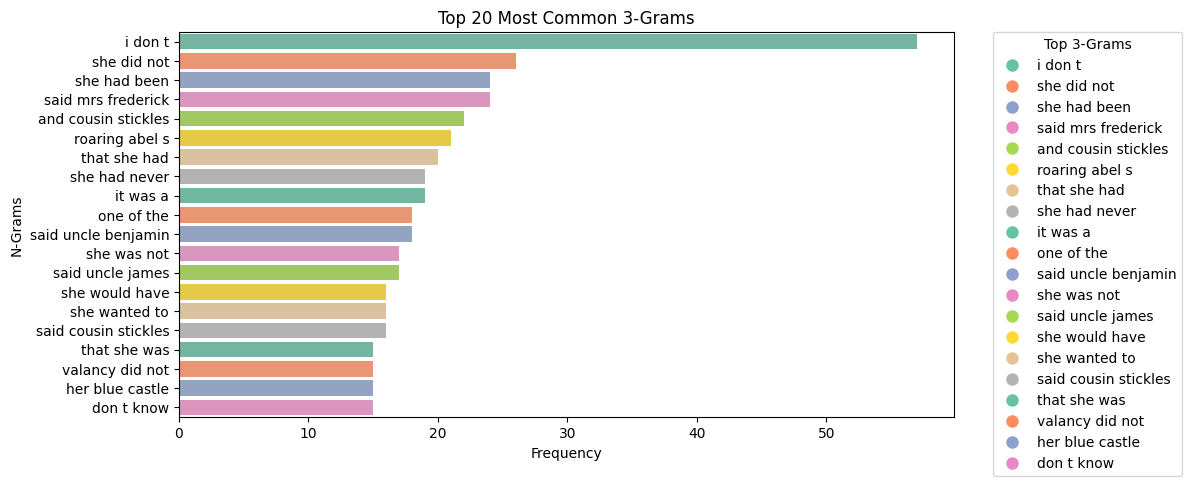


=== Analysis for Horror ===


<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




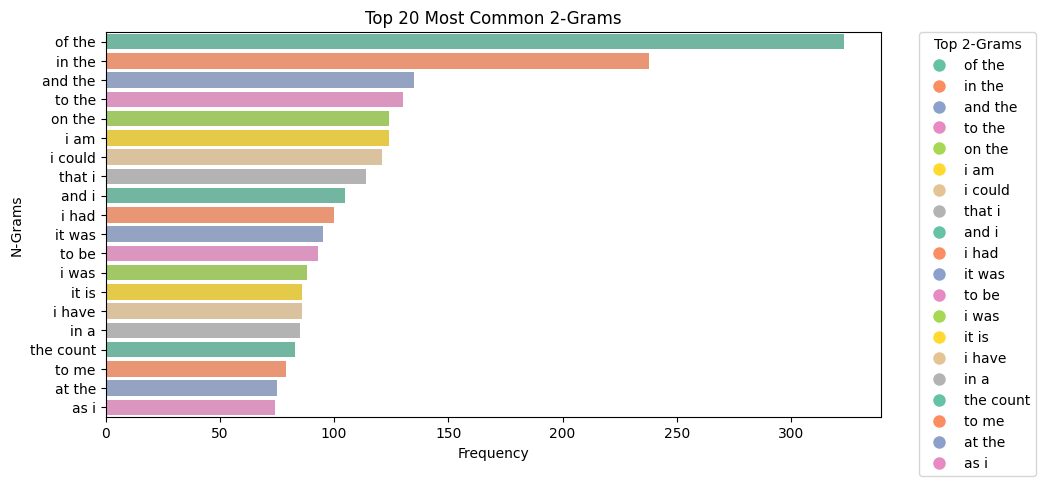

<ipython-input-26-b23c7dbbc795>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




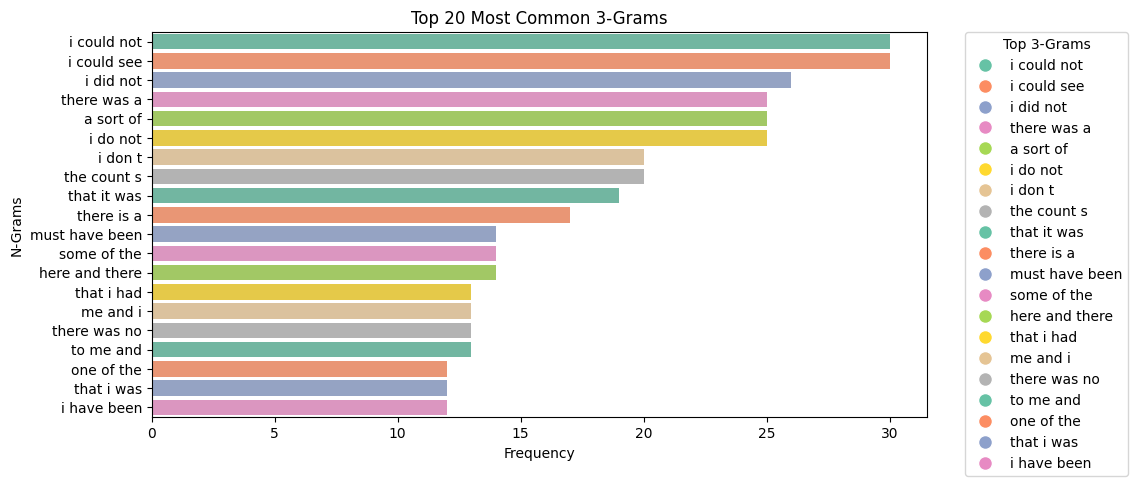

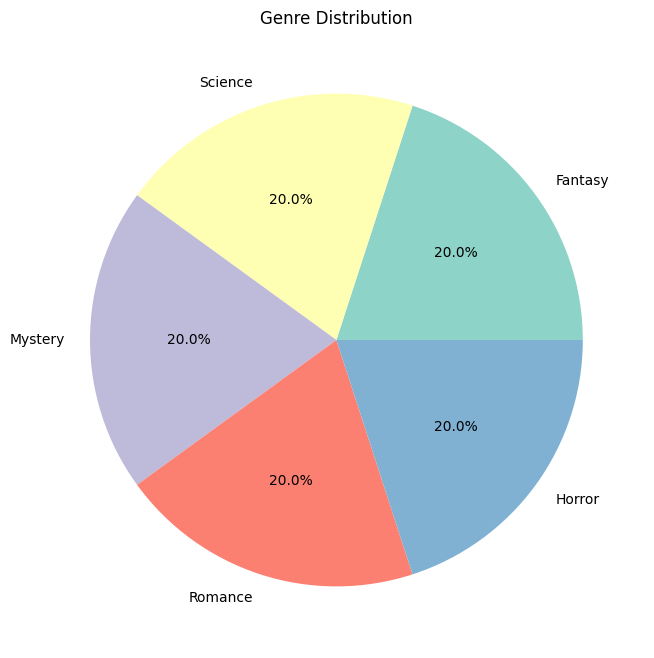

In [ ]:


# Pie chart data preparation and plot
def plot_genre_pie_chart(genre_counts):
    plt.figure(figsize=(8, 8))
    plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("Set3", len(genre_counts)))
    plt.title('Genre Distribution')
    plt.show()

# Plot n-grams with distinct colors and add legend
def plot_ngrams(text, n=2, num_ngrams=20):
    tokens = re.findall(r'\b\w+\b', text.lower())
    n_grams = ngrams(tokens, n)
    ngram_counts = Counter(n_grams)
    most_common_ngrams = ngram_counts.most_common(num_ngrams)

    # Convert n-grams to a DataFrame
    df = pd.DataFrame(most_common_ngrams, columns=['N-Gram', 'Frequency'])
    df['N-Gram'] = df['N-Gram'].apply(lambda x: ' '.join(x))

    # Create color palette for the n-grams
    colors = sns.color_palette("Set2", num_ngrams)

    # Plot with distinct colors
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='N-Gram', data=df, palette=colors)
    plt.title(f'Top {num_ngrams} Most Common {n}-Grams')
    plt.xlabel('Frequency')
    plt.ylabel('N-Grams')

    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=df["N-Gram"][i], markersize=10, markerfacecolor=colors[i]) for i in range(num_ngrams)]
    plt.legend(handles=legend_elements, title=f'Top {n}-Grams', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

# List of genre files and initialize the genre count dictionary
genre_files = ["cleaned_fantasy.txt", "cleaned_science_fiction.txt", "cleaned_mystery.txt", "cleaned_romance.txt", "cleaned_horror.txt"]
genre_counts = {genre.split('_')[1].split('.')[0].capitalize(): 0 for genre in genre_files}

# Perform EDA for each genre and update the genre count
for genre_file in genre_files:
    genre_name = genre_file.split('_')[1].split('.')[0].capitalize()
    genre_counts[genre_name] += 1
    print(f"\n=== Analysis for {genre_name} ===")
    file_path = os.path.join(base_folder_path, genre_file)
    text_data = load_text(file_path)

    # Call EDA functions
    plot_ngrams(text_data, n=2, num_ngrams=20)
    plot_ngrams(text_data, n=3, num_ngrams=20)

# Plot the genre distribution as a pie chart
plot_genre_pie_chart(genre_counts)


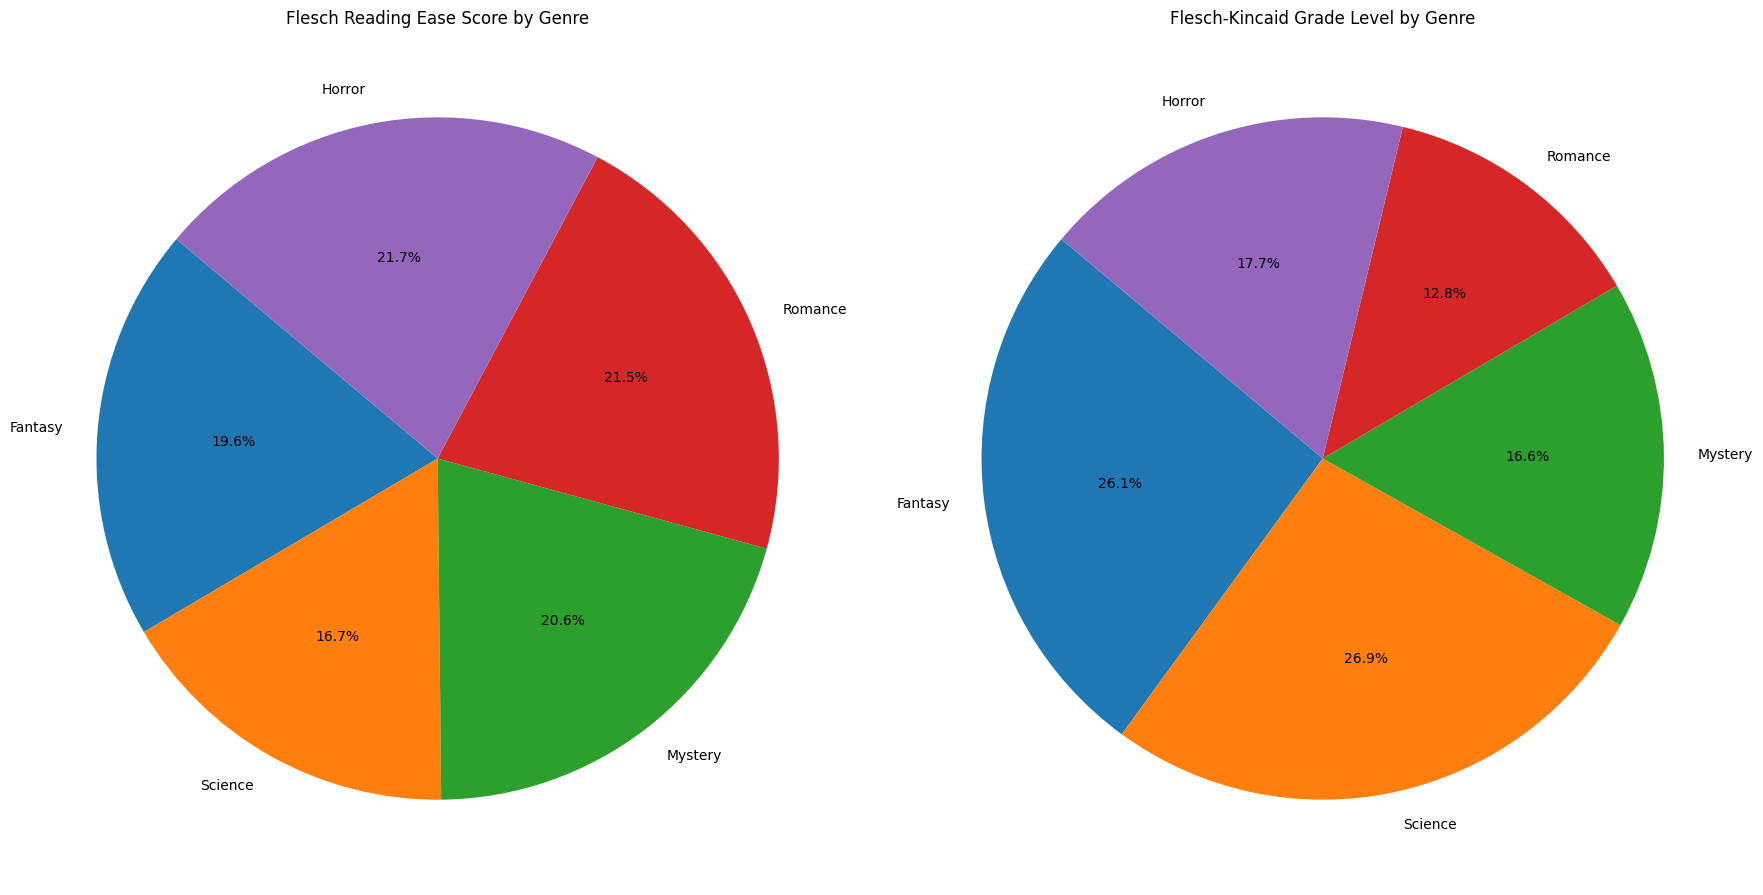

In [ ]:
import matplotlib.pyplot as plt

# Function to create 2D pie charts for Flesch Reading Ease and Flesch-Kincaid Grade Level
def plot_readability_comparison_pie(genre_files, base_folder_path):
    genres = []
    flesch_scores = []
    kincaid_scores = []

    # Process each genre file to get readability scores
    for genre_file in genre_files:
        file_path = os.path.join(base_folder_path, genre_file)
        text_data = load_text(file_path)

        # Get readability scores
        flesch_score = flesch_reading_ease(text_data)
        kincaid_grade = flesch_kincaid_grade(text_data)

        # Append genre names and their scores
        genres.append(genre_file.split('_')[1].split('.')[0].title())
        flesch_scores.append(flesch_score)
        kincaid_scores.append(kincaid_grade)

    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

    # Plot Flesch Reading Ease scores
    ax1.pie(flesch_scores, labels=genres, autopct='%1.1f%%', startangle=140)
    ax1.set_title('Flesch Reading Ease Score by Genre')

    # Plot Flesch-Kincaid Grade Level scores
    ax2.pie(kincaid_scores, labels=genres, autopct='%1.1f%%', startangle=140)
    ax2.set_title('Flesch-Kincaid Grade Level by Genre')

    plt.tight_layout()
    plt.show()

# Call the function with the list of genre files
plot_readability_comparison_pie(genre_files, base_folder_path)


#FINETUNING PRETRAINED GPT NEO(SMALL) ON THE CLEANED DATASET TO GENERATE STORY SIMILAR TO THE STORY WHICH WAS FINETUNED ON THE MODEL BUT ACCORDING TO USER PROMPT


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
import torch #pytorch
from transformers import (
    GPTNeoForCausalLM, GPT2Tokenizer, TextDataset,
    DataCollatorForLanguageModeling, Trainer, TrainingArguments
)
import re
import gradio as gr


In [ ]:
# Load tokenizer for GPT-Neo
model_name = "EleutherAI/gpt-neo-125M"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)  # Load the GPT-2 tokenizer for GPT-Neo model
tokenizer.pad_token = tokenizer.eos_token  # Ensures the End-Of-Sequence token is used for padding
"""why padding is done for tokens: eachh token generated by the gpt2 tokenizer may not be of same length,
to avoid abnormalities in finetuning the  pretrained model we pad the shorter toker with white spaces to match the max length token
so as to ensure uniform length tokens prior to the finetuning,we use the .eos_token for padding since gpt neo and gpt2 are old models and they do not
have padding of token enabled by default"""

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

In [ ]:
# Function to clean the text data again just to ensure that the clean data is really cleaned
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = text.strip()  # Remove leading and trailing whitespace
    text = re.sub(r'[^a-zA-Z0-9.,;:?!\'"() ]+', ' ', text)  # Keep standard punctuation
    return text

In [ ]:
# Function to load and preprocess the dataset
def load_dataset(file_path, tokenizer, block_size=128):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()  # Load raw text data from the file
    cleaned_text = clean_text(text)  # Clean the text using the cleaning function (Again,just to make sure)
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(cleaned_text)  # Overwrite the file with cleaned text for consistency

    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size  # Split the text into chunks of block_size for better model training
    )
"""This function return a text dataset object(TextDataset is a class of transformers lib) that contains  the tokenizer object,
 filepath of the dataset and the block size int hwich the paragraphs must be divided into, here we have taken a default block size of 128 tokens"""

In [ ]:
# Function to train GPT-Neo on a specific genre
def train_gptneo(genre, train_file, model_name=model_name, output_dir='./MyDrive/fine_tuned_models/'):
    model = GPTNeoForCausalLM.from_pretrained(model_name)  # Load pre-trained GPT-Neo model
    dataset = load_dataset(train_file, tokenizer)  # Load and preprocess the dataset(i.e.  tokenize each word from the dataset)
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)  # MLM=False for causal language modeling
"""Collating the data means to batch the data into a suitable format before training the model with the give tokenizer

mlm(masked learning model): its a type of approach where some of the tokens are masked and the model is required to predict the masked tokens
accordingly, this serves as a validation metrics for the trained model,it uses the left and right contents surrounding the
masked token to preict the masked token,mlm is used in models like BERT(Bidirectional Encoder Representations from Transformers)

here we do not require such  approach therefore we have set MLM to false instead we use Casual LLM(GPT NEO/GPT2) which is autoregressive in nature
i.e. it will predict the next word(after looking at the previous text i.e. it is unidirectional) to generate."""


# Training arguments
    training_args = TrainingArguments(
        output_dir="./MyDrive/training_args",  # Directory to save training logs and checkpoints
        overwrite_output_dir=True,  # Overwrite existing directory for new training sessions
        num_train_epochs=10,  # Number of training epochs for multiple passes through data
        per_device_train_batch_size=1,  # Small batch size due to  limited memory
        gradient_accumulation_steps=4,  # Accumulate gradients for 4 steps before a parameter update
        save_steps=500,  # Save model every 500 steps during finetuning the model
        save_total_limit=2,  # Retain only the last 2 checkpoints  to save space(GPU) since we are usign a free version of collab
        prediction_loss_only=True,  # Log only the loss value
        logging_dir='./logs',  # Directory for training logs
        logging_steps=100,  # Log metrics(like loss,etc) every 100 steps
        fp16=True  # Use mixed precision for faster training with reduced memory usage
    )
    """The training arguments have been updated to finetune the model with less resources"""
    """Here we use gradient_accumulation for every 4 steps before updating weights during training because during training its is not feasible to update
    the weights of the model again and again for every step,instead we make gradients and instead of updating the weights during each forward pass/step,
    store them in the gradient and update them after a certain number of steps here after 4 steps, this ensure that during the trainning on the large datasets the
    device vram doesnt go out of memory."""
    trainer = Trainer( #make the trainer object
        model=model,  # Model to be trained
        args=training_args,  # Training arguments specifying configurations
        data_collator=data_collator,  # Handles data batching
        train_dataset=dataset,  # Dataset for training
    )

    trainer.train()  # Start the fine-tuning process when the fucntion is called later.
    trainer.save_model(f"{output_dir}/{genre}")  # Save the fine-tuned model to specified output directory
    tokenizer.save_pretrained(f"{output_dir}/{genre}")  # Save tokenizer settings with model for later use



In [ ]:
# Fine-tune the model for each genre
#weights and biases api key:e0a623ec95fbaedef1af4ee41cfbd21aad90cf03
train_gptneo("fantasy", "/content/drive/MyDrive/finetuning_datasets/cleaned_fantasy.txt") #model_name and output_Dir in nor reuired since it is already referenced
train_gptneo("science_fiction", "/content/drive/MyDrive/finetuning_datasets/cleaned_science_fiction.txt")
train_gptneo("mystery", "/content/drive/MyDrive/finetuning_datasets/cleaned_mystery.txt")
train_gptneo("romance", "/content/drive/MyDrive/finetuning_datasets/cleaned_romance.txt")
train_gptneo("horror", "/content/drive/MyDrive/finetuning_datasets/cleaned_horror.txt")

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
100,3.612300
200,3.094600
300,2.804100
400,2.604000
500,2.419100
600,2.165900
700,1.987400
800,1.852800
900,1.695500
1000,1.574700


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.733100
200,3.260200
300,2.963300
400,2.708400
500,2.459900
600,2.216600
700,1.980400
800,1.754500
900,1.597500
1000,1.459300


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.556100
200,3.132800
300,2.858500
400,2.617300
500,2.423000
600,2.153500
700,1.937600
800,1.779000
900,1.633400
1000,1.497400


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.776600
200,3.274200
300,2.998100
400,2.766000
500,2.497400
600,2.230200
700,2.063500
800,1.873200
900,1.712800
1000,1.522000


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss
100,3.675400
200,3.251800
300,2.945100
400,2.689200
500,2.440300
600,2.216200
700,1.948200
800,1.790900
900,1.603900
1000,1.474500


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import GPTNeoForCausalLM, GPT2Tokenizer  # Import GPT-Neo model and tokenizer
import gradio as gr  # Import Gradio for interactive UI
import os  # Import OS library for file handling

# Load a fine-tuned model based on the selected genre
def load_finetuned_model(genre, model_dir='./drive/MyDrive/fine_tuned_models/'):
    genre_folder = genre.replace(" ", "_").lower()  # Format genre name for folder path
    model_path = f"{model_dir}/{genre_folder}"  # Construct path to the model folder
    model = GPTNeoForCausalLM.from_pretrained(model_path)  # Load fine-tuned GPT-Neo model [model.safetensors in the particular folder]
    tokenizer = GPT2Tokenizer.from_pretrained(model_path)  # Load tokenizer associated with the model[loads the vocab.json,merges.txt (for BPE-based models like GPT-Neo),tokenizer_config.json,special_tokens_map.json]
    return model, tokenizer  # Return both model and tokenizer
# Function to generate text and save it to a file with a specified word count
def generate_text(model, tokenizer, prompt, word_count, genre):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # we use torch to set device to GPU if available, else CPU [to use if collabs free gpu usage is over]
    model.to(device)  # Move model to the chosen device

    try:
        # Tokenize input and move it to the same device(cpu/gpu) as the model
        inputs = tokenizer(prompt, return_tensors='pt').to(device)

        # Generate text with the model
        outputs = model.generate(
            inputs['input_ids'], #here the input_ids are the tokenized inputs
            max_length=300,  # Limit to a max of 300 tokens
            num_return_sequences=1,  # Generate only one sequence[since multiple squences can be generated with same starting words]
            no_repeat_ngram_size=2,  # Avoid repeating n-grams of size 2[this is done to control the amount of repeated words generation problem faced during training previous LSTM models]
            temperature=0.7,  # Controls randomness in generation (lower values make it more focused)
            top_k=50,  # Keep only top 50 most probable next tokens
            top_p=0.95,  # Use nucleus sampling(i.e. choosing the next word for generating from a small set of token) with cumulative probability 0.95
            pad_token_id=tokenizer.eos_token_id  # Use EOS token for padding
        )
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)  # Decode output to readable text

        # Limit the output to the specified word count
        words = generated_text.split()
        if len(words) > word_count:
            generated_text = ' '.join(words[:word_count])  # Truncate text to the specified word count

        # Save to file in /MyDrive/outputs directory
        output_dir = '/MyDrive/outputs'
        os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists
        output_path = os.path.join(output_dir, f"{genre}_story_output.txt")  # Create path for output file
        with open(output_path, 'w') as file:
            file.write(generated_text)  # Write generated text to the file

        print(f"Story saved to {output_path}")  # Inform the user of the file save location
        return generated_text  # Return the generated text for display or further processing
    except Exception as e:
        return f"Error: {str(e)}"  # Handle and return any errors that occur


# Function to generate a story based on the selected genre, user prompt, and desired word count
def story_generator(genre, user_prompt, word_count):
    try:
        #First Load the fine-tuned model for the selected genre according to the user
        model, tokenizer = load_finetuned_model(genre)

        # Generate and return the story[We get user prompt from the interface func below]
        prompt = f"Write a {genre.lower()} story: {user_prompt}"  # Create prompt for story generation
        return generate_text(model, tokenizer, prompt, word_count, genre)  # Generate and return the story
    except Exception as e:
        return f"Error: {str(e)}"  # Handle and return any errors that occur

# Gradio interface with error handling
interface = gr.Interface(
    fn=story_generator,  # Function to call when interacting with the UI(graio automatically transfer the genre,user_prompt,word_count parameters as inputs to the story gen func)
    inputs=[
        gr.Dropdown(["Fantasy", "Science Fiction", "Mystery", "Romance", "Horror"], label="Select Genre"),  # Dropdown for genre selection
        gr.Textbox(lines=2, placeholder="Enter your prompt here..."),  # Textbox for user prompt
        gr.Slider(minimum=10, maximum=2000, step=10, value=100, label="Desired Word Count")  # Slider for word count
    ],
    outputs="text",  # Output format
    title="Custom Story Generator",  # Interface title
    description="Select a genre, enter a prompt, and specify the desired word count to generate your own story."
)

interface.launch()  # Launch the Gradio interface


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5e3a6711436cdcefc4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
